# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [1]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [2]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [ ]:
# TODO
# Insert your code HERE
#Click Through Rates (CTR)
ctr_a = clicks_a / visitors_a
ctr_b = clicks_b / visitors_b

# Print CTR values
print(f"CTR (Version A): {ctr_a:.4f}")
print(f"CTR (Version B): {ctr_b:.4f}")

CTR (Version A): 0.1500
CTR (Version B): 0.1714


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [ ]:
# Null Hypothesis (H₀): `There is no significant difference in CTRs between Version A and Version B.`.
# Alternative Hypothesis `The CTR of Version B is significantly higher than Version A`.



- Run the Test

In [5]:
# TODO
# Insert your code HERE
#Contingency Table to perform Chi-Square Test

contigency_table = [[clicks_a, visitors_a - clicks_a], [clicks_b, visitors_b - clicks_b]]

#Chi-Square Test

chi2, p_value, dof , expected = stats.chi2_contingency(contigency_table)

# Output results
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

Chi-Square Statistic: 1.5863
P-Value: 0.2079
Degrees of Freedom: 1
Expected Frequencies:
[[160.97560976 839.02439024]
 [169.02439024 880.97560976]]


> Interpret Results

In [12]:
# TODO
# Insert your code HERE
# Significance level
alpha = 0.05  

# Interpretation
if p_value < alpha:
    print("Result: Reject the null hypothesis. Version B has a statisical significant impact on CTR.")
else:
    print("Result: Fail to reject the null hypothesis. No statisical significant difference in CTR.")

Result: Fail to reject the null hypothesis. No statisical significant difference in CTR.


📈 Visualization

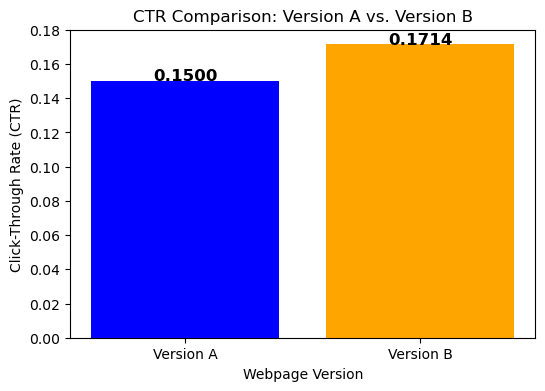

In [11]:
# TODO
# Insert your code HERE
# Labels and values
versions = ['Version A', 'Version B']
ctrs = [ctr_a, ctr_b]

#Bar chart for visualization
plt.figure(figsize =(6, 4))
plt.bar(versions, ctrs, color =['blue', 'orange'])
plt.xlabel("Webpage Version")
plt.ylabel("Click-Through Rate (CTR)")
plt.title("CTR Comparison: Version A vs. Version B")
# Display values on bars
for i, v in enumerate(ctrs):
    plt.text(i, v + 0.0001, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [47]:
### Import Libraries
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [98]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("./data/marketing_AB.csv")  # Download from Kaggle first!

In [99]:
# Quick exploration of the dataset
display(data.head())  
data.info()  


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [100]:
# Dropping unnecessary index column
data.drop(columns=["Unnamed: 0"], inplace=True)
# Standardizing column names 
data.columns = data.columns.str.replace(" ", "_")


In [101]:
display(data.head()) 

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [102]:
# Checking sample sizes for A/B groups
display(data["test_group"].value_counts()) 

# Checking overall conversion rates
data["converted"].value_counts() 

test_group
ad     564577
psa     23524
Name: count, dtype: int64

converted
False    573258
True      14843
Name: count, dtype: int64

📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [103]:
# TODO
# Insert your code HERE
# Conversion Rate= Converted Users /Total Users
# Conversion rates for each group
conversion_rates = data.groupby('test_group')['converted'].mean()

# Display conversion rates
print(f"Conversion Rate (Group A): {conversion_rates['ad']:.4f}")
print(f"Conversion Rate (Group B): {conversion_rates['psa']:.4f}")

Conversion Rate (Group A): 0.0255
Conversion Rate (Group B): 0.0179


In [104]:
# Hypotheses
# Null Hypothesis (H₀): There is no significant difference in conversion rates between Group A (Ad) and Group B (PSA).
# Alternative Hypothesis (H₁): The conversion rate of Group A (Ad) is significantly higher than Group B (PSA).

> Statistical Test

In [105]:
# TODO
# Insert your code HERE
# Since we are comparing conversion rates between two independent groups (Ad vs. PSA campaign), a two proportion Z-test is a good choice.
# It directly compares proportions (conversion rates) between two groups.
# It calculates whether the difference is large enough to be statistically significant.

# Defining the success counts (converted users) and total users per group
converted_counts = data.groupby("test_group")["converted"].sum()  # Total converted users
total_counts = data["test_group"].value_counts()  # Total users per group

# Two-Proportion Z-Test
z_stat, p_value = proportions_ztest(count=converted_counts, nobs=total_counts, alternative="larger")

# Output results
print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

Z-Statistic: 7.3700781265454145
P-Value: 8.526403580779863e-14


In [106]:
# Significance level
alpha = 0.05  

# Interpretation
if p_value < alpha:
    print("Result: Reject the null hypothesis. The Ad campaign has a significantly higher conversion rate than the PSA campaign.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference in conversion rates.")

Result: Reject the null hypothesis. The Ad campaign has a significantly higher conversion rate than the PSA campaign.


In [ ]:
# For the Business:
# Running Ad campaigns might be more effective than PSA campaigns for driving conversions.

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

In [107]:
# TODO
# Insert your code HERE
# Defining Bootstrap Function:
def bootstrap_conversion_rate (data, group, n_resamples= 1000):
    boot_means = []
    group_data = data[data['test_group'] == group]['converted']

    for _ in range(n_resamples):
        sample = np.random.choice(group_data, size=len(group_data), replace=True)
        boot_means.append(sample.mean())

    # 95% Confidence Interval
    lower_bound = np.percentile(boot_means, 2.5)
    upper_bound = np.percentile(boot_means, 97.5)

    return np.mean(boot_means), lower_bound, upper_bound

# Apply Boostraping for Group A and Group B
boot_a_mean, boot_a_lower, boot_a_upper = bootstrap_conversion_rate(data, "ad")
boot_b_mean, boot_b_lower, boot_b_upper = bootstrap_conversion_rate(data, "psa")

# Results
print(f"Bootstrapped Conversion Rate (Ad Group): {boot_a_mean:.4f} (95% CI: [{boot_a_lower:.4f}, {boot_a_upper:.4f}])")
print(f"Bootstrapped Conversion Rate (PSA Group): {boot_b_mean:.4f} (95% CI: [{boot_b_lower:.4f}, {boot_b_upper:.4f}])")

Bootstrapped Conversion Rate (Ad Group): 0.0256 (95% CI: [0.0251, 0.0260])
Bootstrapped Conversion Rate (PSA Group): 0.0178 (95% CI: [0.0163, 0.0196])


>Visualize Results

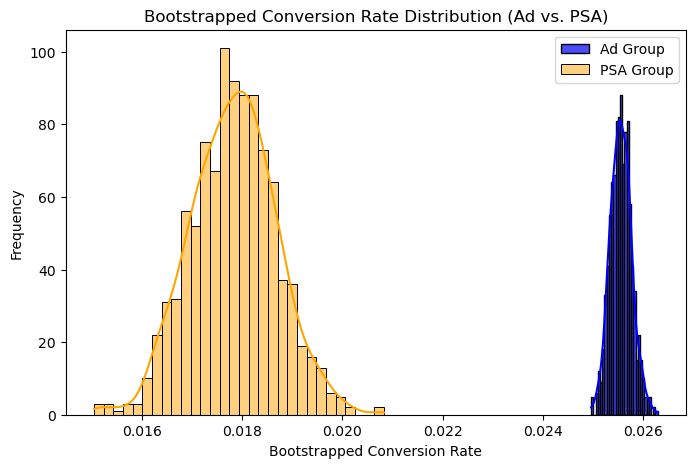

In [108]:
# TODO
# Insert your code HERE
# Generating bootstrap samples for visualization
n_resamples = 1000
boot_a_means = [np.random.choice(data[data["test_group"] == "ad"]["converted"], size=len(data[data["test_group"] == "ad"]), 
                                 replace=True).mean() for _ in range(n_resamples)]
boot_b_means = [np.random.choice(data[data["test_group"] == "psa"]["converted"], size=len(data[data["test_group"] == "psa"]), 
                                 replace=True).mean() for _ in range(n_resamples)]

# Histogram for bootstrapped conversion rates
plt.figure(figsize=(8, 5))
sns.histplot(boot_a_means, color="blue", bins=30, kde=True, alpha=0.7, label="Ad Group")
sns.histplot(boot_b_means, color="orange", bins=30, kde=True, alpha=0.5, label="PSA Group")

# labels and title
plt.xlabel("Bootstrapped Conversion Rate")
plt.ylabel("Frequency")
plt.title("Bootstrapped Conversion Rate Distribution (Ad vs. PSA)")
plt.legend()
plt.show()

In [ ]:
#The histogram shows the distribution of bootstrapped conversion rates for the Ad (blue) and PSA (orange) groups. 
# The Ad group consistently has higher conversion rates centered around 2.6%, while the PSA group remains lower at around 1.8%. 
# Both distributions highlight variability but confirm the Ad campaign's superiority. Even with resampling, the Ad campaign outperforms PSA in every scenario.

## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [ ]:
# Import Libraries

In [56]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

In [61]:
# Quick exploration of dataset
display(data.head())  # Show first few rows
data.info() # Check structure


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [60]:
# Sample sizes for gate_30 and gate_40
display(data["version"].value_counts())  
# Overview of retention rates
data[["retention_1", "retention_7"]].describe()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

,retention_1,retention_7
count,90189,90189
unique,2,2
top,False,False
freq,50036,73408


📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [69]:
# TODO
# Insert your code HERE
# Compare retention rates 1-Day
retention_1_rates = data.groupby("version")["retention_1"].mean()

# Display retention rates
print(f"1-Day Retention Rate (Gate 30): {retention_1_rates['gate_30']:.4f}")
print(f"1-Day Retention Rate (Gate 40): {retention_1_rates['gate_40']:.4f}")

1-Day Retention Rate (Gate 30): 0.4482
1-Day Retention Rate (Gate 40): 0.4423


> Statistical Test

In [71]:
# TODO
# Insert your code HERE
# Defining success counts (players retained) and total players per group
retained_counts_1 = data.groupby("version")["retention_1"].sum()  # Total retained players
total_counts_1 = data["version"].value_counts()  # Total players per group

# Two-Proportion Z-Test
z_stat_1, p_value_1 = proportions_ztest(count=retained_counts_1, nobs=total_counts_1, alternative="larger")

# Output results
print(f"Z-Statistic (1-Day Retention): {z_stat_1:.4f}")
print(f"P-Value (1-Day Retention): {p_value_1:.4f}")

Z-Statistic (1-Day Retention): -2.9231
P-Value (1-Day Retention): 0.9983


In [82]:
# Significance level
alpha = 0.05  

# Interpretation
if p_value_1 < alpha:
    print("Result: Reject the null hypothesis. Changing the gate significantly impacts 1-Day retention.")
else:
    print("Result: Fail to reject the null hypothesis. No strong evidence that changing the gate affects 1-Day retention.")

Result: Fail to reject the null hypothesis. No strong evidence that changing the gate affects 1-Day retention.


In [ ]:
# Moving the gate to level 40 doesn’t drastically affect 1-day retention rates, suggesting players likely continue their normal play patterns.

 Compare 7-Day Retention

In [ ]:
# TODO
# Insert your code HERE
# Compare retention rates 7-Day
retention_7_rates = data.groupby("version")["retention_7"].mean()

# Display retention rates
print(f"7-Day Retention Rate (Gate 30): {retention_7_rates['gate_30']:.4f}")
print(f"7-Day Retention Rate (Gate 40): {retention_7_rates['gate_40']:.4f}")

7-Day Retention Rate (Gate 30): 0.1902
7-Day Retention Rate (Gate 40): 0.1820


> Statistical Test

In [80]:
# TODO
# Insert your code HERE
# Defining success counts (players retained) and total players per group
retained_counts_7 = data.groupby("version")["retention_7"].sum()  # Total retained players
total_counts_7 = data["version"].value_counts()  # Total players per group

# Two-Proportion Z-Test
z_stat_7, p_value_7 = proportions_ztest(count=retained_counts_7, nobs=total_counts_7, alternative="larger")

# Output results
print(f"Z-Statistic (7-Day Retention): {z_stat_7:.4f}")
print(f"P-Value (7-Day Retention): {p_value_7:.4f}")

Z-Statistic (7-Day Retention): 0.6520
P-Value (7-Day Retention): 0.2572


In [81]:
# Significance level
alpha = 0.05  

# Interpretation
if p_value_7 < alpha:
    print("Result: Reject the null hypothesis. Changing the gate significantly impacts 7-Day retention.")
else:
    print("Result: Fail to reject the null hypothesis. No strong evidence that changing the gate affects 7-Day retention.")

Result: Fail to reject the null hypothesis. No strong evidence that changing the gate affects 7-Day retention.


In [ ]:
# Gate placement does not significantly impact long-term player retention. 
# Players should continue engaging at similar rates regardless of whether the first gate is at level 30 or level 40.

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [ ]:
# TODO
# Insert your code HERE
#We will analyze retention rates every 500 users to see if the results remain stable throughout.(1-Day)
# Sorting data to simulate incoming user registrations
data_sorted = data.sample(frac=1, random_state=42)  # Shuffle the data randomly

# The batch size for sequential testing
batch_size = 500

# Storing results for analysis
sequential_results = []

# Looping through the dataset in increments of 500 users
for i in range(batch_size, len(data_sorted), batch_size):

    # Get subset of data
    batch_data = data_sorted.iloc[:i] #Select current batch

    # Retention rates for batch
    retention_rates_batch = batch_data.groupby("version")["retention_1"].mean()

    # Z-Test for this batch
    retained_counts_batch = batch_data.groupby("version")["retention_1"].sum()
    total_counts_batch = batch_data["version"].value_counts()
    z_stat_batch, p_value_batch = proportions_ztest(count=retained_counts_batch, nobs=total_counts_batch, alternative="larger")

    # Store results
    sequential_results.append((i, retention_rates_batch["gate_30"], retention_rates_batch["gate_40"], z_stat_batch, p_value_batch))

# Convert results to DataFrame for visualization
sequential_df = pd.DataFrame(sequential_results, columns=["Sample_Size", "Retention_30", "Retention_40", "Z-Statistic", "P-Value"])

# Display the first few rows
display(sequential_df.head())

,Sample_Size,Retention_30,Retention_40,Z-Statistic,P-Value
0,500,0.493827,0.408560,0.782379,0.216996
1,1000,0.448077,0.427083,0.668504,0.251906
2,1500,0.450955,0.448951,0.077935,0.468940
3,2000,0.449704,0.455375,-0.254747,0.600541
4,2500,0.455847,0.453741,0.105747,0.457892


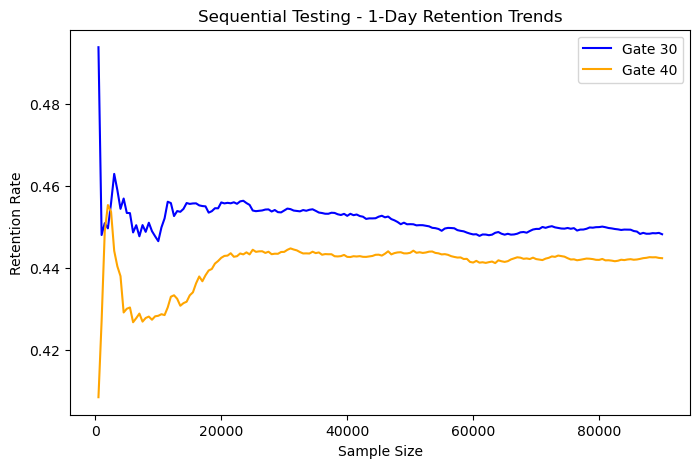

In [ ]:
#Line Chart of Sequential Results 1-Day
# Plot of Retention rates for both groups
plt.figure(figsize=(8, 5))
plt.plot(sequential_df["Sample_Size"], sequential_df["Retention_30"], label="Gate 30", color="blue")
plt.plot(sequential_df["Sample_Size"], sequential_df["Retention_40"], label="Gate 40", color="orange")

# Labels and title
plt.xlabel("Sample Size")
plt.ylabel("Retention Rate")
plt.title("Sequential Testing - 1-Day Retention Trends")
plt.legend()
plt.show()

In [ ]:
# The Line plot shows Retention rates stabilize as the sample size grows. 
# Gate 30 had a higher initial retention rate but converged with Gate 40 as more data was collected. 
# No statistically significant difference between Gate 30 and Gate 40 for 1-day retention.

In [ ]:
# TODO
# Insert your code HERE
#We will analyze retention rates every 500 users to see if the results remain stable throughout (7-Day)
# Sorting data to simulate incoming user registrations
data_sorted = data.sample(frac=1, random_state=42)  # Shuffle the data randomly

# The batch size for sequential testing
batch_size = 500

# Storing results for analysis
sequential_results_7 = []

# Looping through the dataset in increments of 500 users
for i in range(batch_size, len(data_sorted), batch_size):

    # Get subset of data
    batch_data = data_sorted.iloc[:i] # Select current batch

    # Retention rates for batch
    retention_rates_batch_7 = batch_data.groupby("version")["retention_7"].mean()

    # Z-Test for this batch
    retained_counts_batch_7 = batch_data.groupby("version")["retention_7"].sum()
    total_counts_batch_7 = batch_data["version"].value_counts()
    z_stat_batch_7, p_value_batch_7 = proportions_ztest(count=retained_counts_batch_7, nobs=total_counts_batch_7, alternative="larger")

    # Store results
    sequential_results_7.append((i, retention_rates_batch_7["gate_30"], retention_rates_batch_7["gate_40"], z_stat_batch_7, p_value_batch_7))

# Convert results to DataFrame for visualization
sequential_df_7 = pd.DataFrame(sequential_results_7, columns=["Sample_Size", "Retention_30", "Retention_40", "Z-Statistic", "P-Value"])

# Display the first few rows
display(sequential_df_7.head())

,Sample_Size,Retention_30,Retention_40,Z-Statistic,P-Value
0,500,0.172840,0.190661,-1.107096,0.865874
1,1000,0.165385,0.197917,-1.334912,0.909047
2,1500,0.173248,0.200000,-1.329913,0.908227
3,2000,0.173570,0.200811,-1.562086,0.940866
4,2500,0.175815,0.193081,-1.113016,0.867149


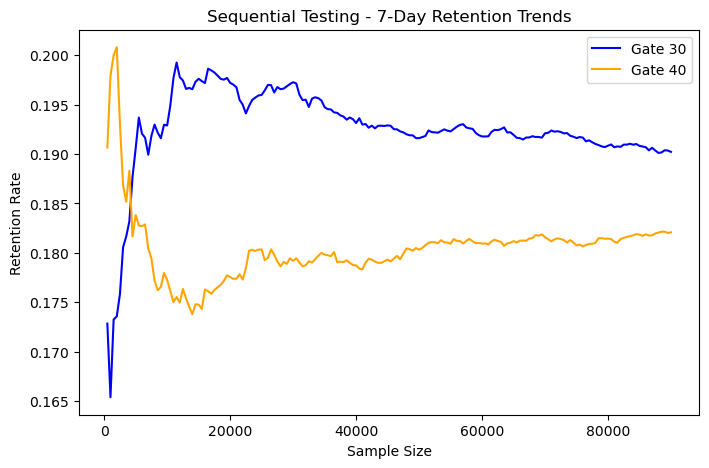

In [87]:
#Line Chart of Sequential Results 7-Day
# Plot of Retention rates for both groups
plt.figure(figsize=(8, 5))
plt.plot(sequential_df_7["Sample_Size"], sequential_df_7["Retention_30"], label="Gate 30", color="blue")
plt.plot(sequential_df_7["Sample_Size"], sequential_df_7["Retention_40"], label="Gate 40", color="orange")

# Labels and title
plt.xlabel("Sample Size")
plt.ylabel("Retention Rate")
plt.title("Sequential Testing - 7-Day Retention Trends")
plt.legend()
plt.show()

In [ ]:
# The graph shows how 7-day retention rates change as more players are analyzed over time. 
# Initially, Gate 40 had slightly higher retention than Gate 30, but as more users were added, the difference became less distinct. 
# The trend stabilizes, indicating no major long-term impact of changing the gate placement.

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [92]:
# TODO
# Insert your code HERE
from statsmodels.stats.power import TTestIndPower

#For this analysis, we assume: Significance level (α) = 0.05 → Standard threshold for statistical significance. 
# Power = 0.8 (80%) → Probability of correctly detecting a true difference if one exists. 
# Expected retention difference = 2% (0.02) → Minimum change we want to detect.

# Parameters for 1-Day
effect_size_1 = 0.02  #Minimum detectable difference in 1-day retention rates
alpha = 0.05  # Significance level
power = 0.8  # Statistical power

# Power analysis
analysis_1= TTestIndPower()
required_sample_size_1 = analysis_1.solve_power(effect_size=effect_size_1, alpha=alpha, power=power, alternative='two-sided')

# Output results
print(f"Required Sample Size per group,(1-Day Retention): {int(required_sample_size_1)}")
print(f"Total Sample Size (both groups),(1-Day Retention): {int(required_sample_size_1 * 2)}")

Required Sample Size per group,(1-Day Retention): 39245
Total Sample Size (both groups),(1-Day Retention): 78490


In [94]:
# Parameters for 7-Day
effect_size_7 = 0.02  #Minimum detectable difference in 7-day retention rates
alpha = 0.05  # Significance level
power = 0.8  # Statistical power

# Power analysis
analysis_7= TTestIndPower()
required_sample_size_7 = analysis_7.solve_power(effect_size=effect_size_7, alpha=alpha, power=power, alternative='two-sided')

# Output results
print(f"Required Sample Size per group,(7-Day Retention): {int(required_sample_size_7)}")
print(f"Total Sample Size (both groups),(7-Day Retention): {int(required_sample_size_7 * 2)}")

Required Sample Size per group,(7-Day Retention): 39245
Total Sample Size (both groups),(7-Day Retention): 78490


In [ ]:
# Understanding the Power Analysis:
# 1-Large Sample Size required
    # To detect a 2% difference in retention, we need 39,245 players per group (total 78,490 players).
    # This means small changes in retention rates require lots of data to confirm statistical significance.

# 2- Same Sample Size for Both Timeframes
    # The required sample size for 1-day and 7-day retention is identical.
    # This suggests that the variance and expected difference in retention rates are similar in both cases.

# 3- Practical Implications
    # If the game has fewer than 78,490 players in the experiment, the study may lack statistical power to detect small changes.
    # A smaller effect size (e.g., 1% instead of 2%) would require an even larger sample size.
    # Before running the experiment, game developers must check if they have enough players to get reliable results.
  

In [ ]:
# Final Thoughts
# 1. Does gate_40 significantly impact retention?
    # 1-Day Retention:
        # Gate 30 had a slightly higher retention rate than Gate 40.
        # However, the p-value was far above 0.05, meaning no statistically significant difference was found.
    # 7-Day Retention:
        # Gate 40 had a slight advantage initially but the gap narrowed as more players were analyzed.
        # Again, statistical tests showed no strong evidence that moving the gate affected long-term engagement.
# Conclusion: 
# Gate placement does not significantly impact player retention,
# - meaning players adapt to game progression regardless of whether the first gate is encountered at level 30 or level 40.

# 2. How Does Sequential Testing Affect Decision-Making?
# Early Fluctuations:
    # Initial batches showed some variability in retention rates, but as more data was gathered, the differences stabilized.
# Avoiding Peeking Bias:
    # Checking results too early could lead to false conclusions, as retention rates fluctuate in small samples.
# Final Outcome:
    # As sample size grew, retention rates converged, confirming that gate placement was not a strong factor in player behavior.
# Conclusion: Sequential testing helps monitor results over time but must be used cautiously to avoid premature decisions based on early data.

Enjoy & Happy A/B Testing :) ......!